In [1]:
period=-1200
time_interval='1wk'

%run crypto_data_loader.ipynb

yfinance version: 0.2.47
Start load crypto data with interval: 1wk, from: 2021-08-15 15:58:48.881893


[*********************100%***********************]  4 of 4 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 173 entries, 2021-08-09 00:00:00+00:00 to 2024-11-25 00:00:00+00:00
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (BTC-USD, Adj Close)  173 non-null    float64
 1   (ETH-USD, Adj Close)  173 non-null    float64
 2   (SOL-USD, Adj Close)  173 non-null    float64
 3   (XRP-USD, Adj Close)  173 non-null    float64
 4   (BTC-USD, Close)      173 non-null    float64
 5   (ETH-USD, Close)      173 non-null    float64
 6   (SOL-USD, Close)      173 non-null    float64
 7   (XRP-USD, Close)      173 non-null    float64
 8   (BTC-USD, High)       173 non-null    float64
 9   (ETH-USD, High)       173 non-null    float64
 10  (SOL-USD, High)       173 non-null    float64
 11  (XRP-USD, High)       173 non-null    float64
 12  (BTC-USD, Low)        173 non-null    float64
 13  (ETH-USD, Low)        173 non-null    float64
 14  (SOL-USD, Low)        173

In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn
import plotly.express as px
import warnings
from scipy import stats
import statsmodels.api as sm

%run file_loader.ipynb

## Загрузка данных

In [3]:
crypto_tickers = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'XRP-USD']
dir = "crypto_data"
crypto_data = {};
crypto_df = pd.DataFrame()
for name in crypto_tickers:
    f = os.path.join(dir, name+'.csv')
    if os.path.isfile(f):
        df = loading(f, name) #Date
        # df = loading_v2(f, name) #Datetime, 1h, mins
        if crypto_df.empty:
            crypto_df = df
        else:
            crypto_df = crypto_df.merge(df, on='date', how='outer')
crypto_df = crypto_df.sort_values('date').reset_index(drop=True)
crypto_df = crypto_df.set_index('date')

crypto_df.tail(5)

,BTC-USD,BTC-USD_vol,BTC-USD_chg,BTC-USD_vol_chg,ETH-USD,ETH-USD_vol,ETH-USD_chg,ETH-USD_vol_chg,SOL-USD,SOL-USD_vol,SOL-USD_chg,SOL-USD_vol_chg,XRP-USD,XRP-USD_vol,XRP-USD_chg,XRP-USD_vol_chg
date,,,,,,,,,,,,,,,,
2024-10-28 00:00:00+00:00,68741.117188,281658996077,1.20,33.64,2456.425293,128823462221,-1.98,14.17,162.551300,20388709857,-7.93,-17.92,0.502931,6582525537,-2.60,-4.45
2024-11-04 00:00:00+00:00,80474.187500,436048950363,17.07,54.81,3191.331299,221176275359,29.92,71.69,210.613724,38178045532,29.57,87.25,0.589382,13088855105,17.19,98.84
2024-11-11 00:00:00+00:00,89845.851562,631742325166,11.65,44.88,3075.661621,287557599499,-3.62,30.01,237.575531,61780438566,12.80,61.82,1.054335,78828815488,78.89,502.26
2024-11-18 00:00:00+00:00,98013.820312,502412531238,9.09,-20.47,3363.659912,250186107924,9.36,-13.00,252.919525,51514472456,6.46,-16.62,1.432411,80039342341,35.86,1.54
2024-11-25 00:00:00+00:00,93866.648438,256548916361,-4.23,-48.94,3459.099854,131217795514,2.84,-47.55,235.775940,20118773084,-6.78,-60.95,1.446400,29881575336,0.98,-62.67


In [4]:
crypto_df.isnull().sum()

BTC-USD            0
BTC-USD_vol        0
BTC-USD_chg        0
BTC-USD_vol_chg    0
ETH-USD            0
ETH-USD_vol        0
ETH-USD_chg        0
ETH-USD_vol_chg    0
SOL-USD            0
SOL-USD_vol        0
SOL-USD_chg        0
SOL-USD_vol_chg    0
XRP-USD            0
XRP-USD_vol        0
XRP-USD_chg        0
XRP-USD_vol_chg    0
dtype: int64

In [5]:
crypto_df = crypto_df.dropna()
crypto_df[-380:].describe()

,BTC-USD,BTC-USD_vol,BTC-USD_chg,BTC-USD_vol_chg,ETH-USD,ETH-USD_vol,ETH-USD_chg,ETH-USD_vol_chg,SOL-USD,SOL-USD_vol,SOL-USD_chg,SOL-USD_vol_chg,XRP-USD,XRP-USD_vol,XRP-USD_chg,XRP-USD_vol_chg
count,173.000000,1.730000e+02,173.000000,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,1.730000e+02,173.000000,173.000000
mean,41079.940695,1.962954e+11,0.679191,6.893410,2426.541781,9.756780e+10,0.437168,6.883237,88.699263,1.412412e+10,2.140462,15.228266,0.599974,1.308118e+10,0.650173,10.620173
std,18331.368250,8.285535e+10,7.507166,56.144716,890.600816,4.601461e+10,9.073796,51.252424,67.061556,1.157196e+10,16.221802,102.786610,0.237707,1.056362e+10,11.677847,66.172591
min,16291.832031,3.098896e+10,-23.200000,-54.960000,1073.766968,2.216621e+10,-24.350000,-56.920000,9.982173,1.197975e+09,-59.720000,-78.720000,0.321703,4.474912e+09,-27.700000,-62.670000
25%,26189.583984,1.435354e+11,-2.890000,-12.960000,1681.436157,6.226910e+10,-4.960000,-13.850000,24.261019,5.009914e+09,-7.770000,-22.970000,0.457550,7.164032e+09,-5.440000,-20.330000
50%,38419.984375,1.889388e+11,0.000000,0.910000,2281.471191,9.919355e+10,-0.310000,0.080000,75.220184,1.251591e+10,-0.770000,0.000000,0.528211,9.681496e+09,-0.840000,-3.180000
75%,57325.488281,2.261420e+11,4.640000,17.560000,3157.751465,1.256185e+11,6.120000,16.630000,145.713028,1.846176e+10,9.940000,25.310000,0.661147,1.483444e+10,4.440000,19.840000
max,98013.820312,6.317423e+11,26.510000,662.500000,4626.358887,2.875576e+11,29.920000,552.600000,252.919525,6.417377e+10,59.730000,1221.530000,1.446400,8.003934e+10,78.890000,502.260000


## Summary

In [6]:
colors = ['blue', 'orange', 'green', 'red']

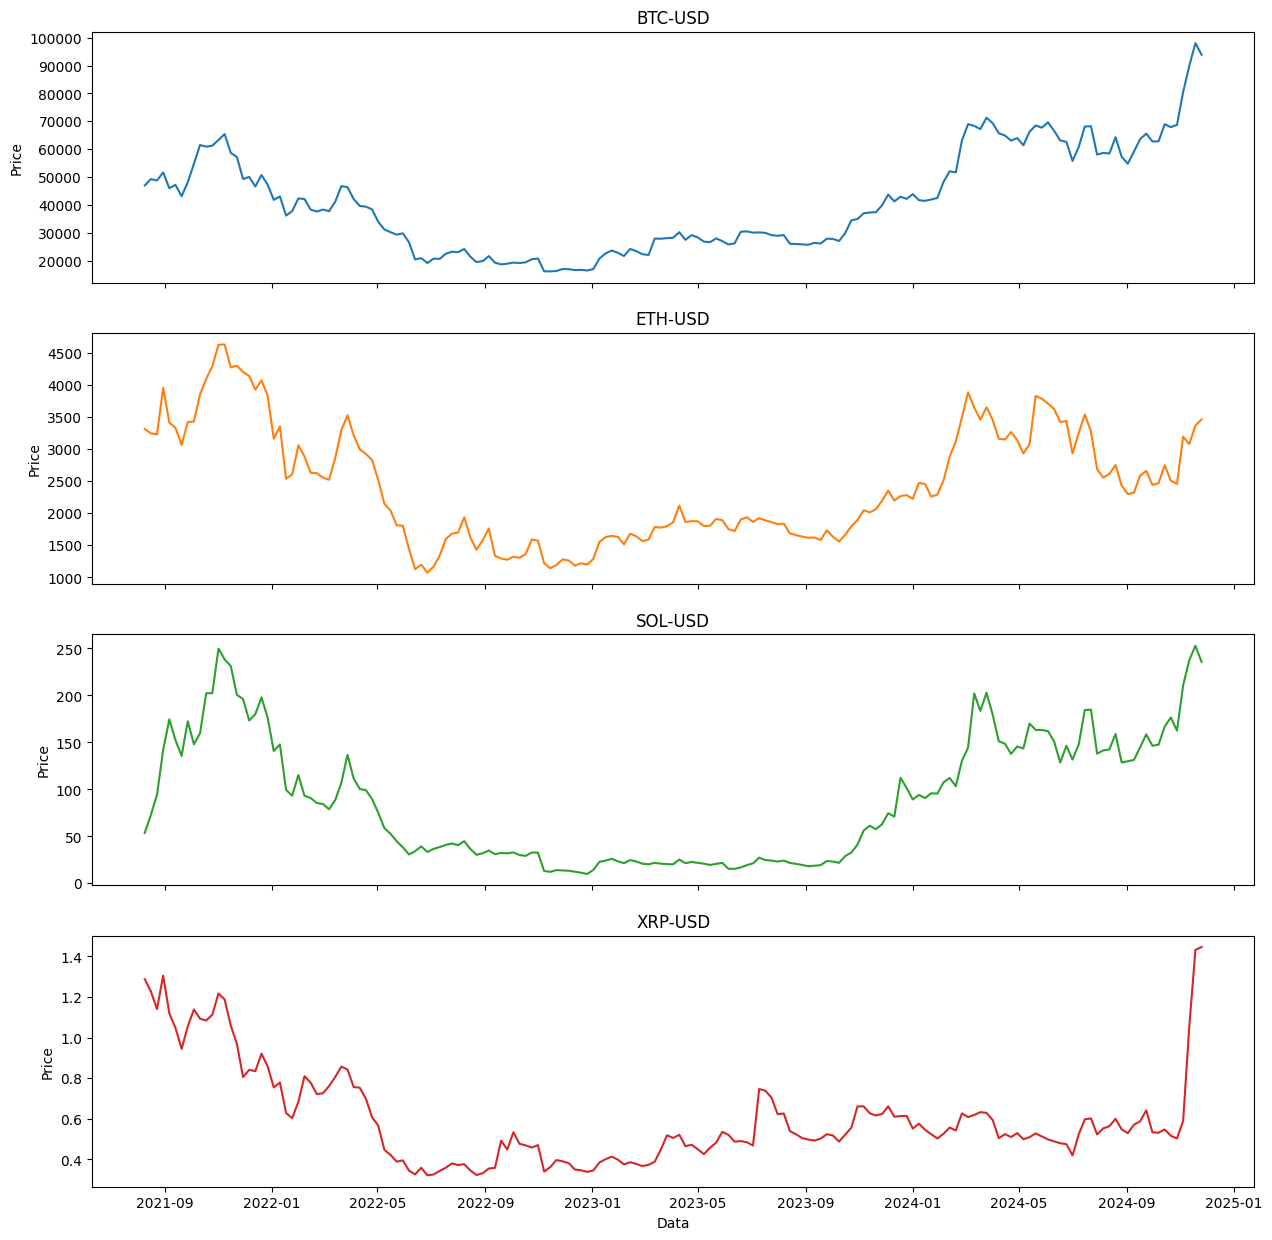

In [7]:
fig, axs = plt.subplots(len(crypto_tickers), 1, figsize=(15,15))
ind = 0
for i in range(len(crypto_tickers)):
    column = crypto_tickers[ind]
    color = colors[ind]
    axs[i].plot(crypto_df.index, crypto_df[column], color=f'tab:{color}' )
    axs[i].set_title(column, fontsize=12)
    ind += 1

for ax in axs.flat:
    ax.set(xlabel='Data', ylabel='Price')


for ax in axs.flat:
    ax.label_outer()

# plt.rcParams['axes.labelsize'] = 'larger' #xx-small, x-small, small, medium, large, x-large, xx-large, smaller, larger.
plt.show()

In [8]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=len(crypto_tickers), cols=1,
    subplot_titles=crypto_tickers)

ind = 0
for i in range(1,len(crypto_tickers) + 1):
    column = crypto_tickers[ind]
    color = colors[ind]
    fig.add_trace(go.Scatter(x=crypto_df.index, y=crypto_df[column], name=column), row=i, col=1)
    ind += 1

fig.show()

## Выводы
1. Какой-то волновой эффект от битка, все возбудились с небольшой задержкой, виден подъем
2. Влияние биткоина очевидна, паровоз в мире цифровых валют
3. Июль 2022 был благоприятным временем для вложения, вот только смущает 6 месячный боковик, как бы не поддаться сетименту и не продать раньше времени
4. Необходимы дополнительные показатели для построении стратегии на краткосрок

In [9]:
# plotly
fig = make_subplots(rows=len(crypto_tickers), cols=1, subplot_titles=crypto_tickers)

ind = 0
for i in range(1,len(crypto_tickers) + 1):
    column = crypto_tickers[ind]
    color = colors[ind]
    fig.add_trace(go.Scatter(x=crypto_df.index, y=crypto_df[column + '_chg'], name=column), row=i, col=1)
    ind += 1

fig.show()

## Выводы
1. Если не ошибаюсь доходность за период с 2020.06 по 2024.06 составляла от -5% до +10%

# Гистограмы распределения ежедневных доходов

array([[<Axes: title={'center': 'BTC-USD_chg'}>,
        <Axes: title={'center': 'ETH-USD_chg'}>],
       [<Axes: title={'center': 'SOL-USD_chg'}>,
        <Axes: title={'center': 'XRP-USD_chg'}>]], dtype=object)

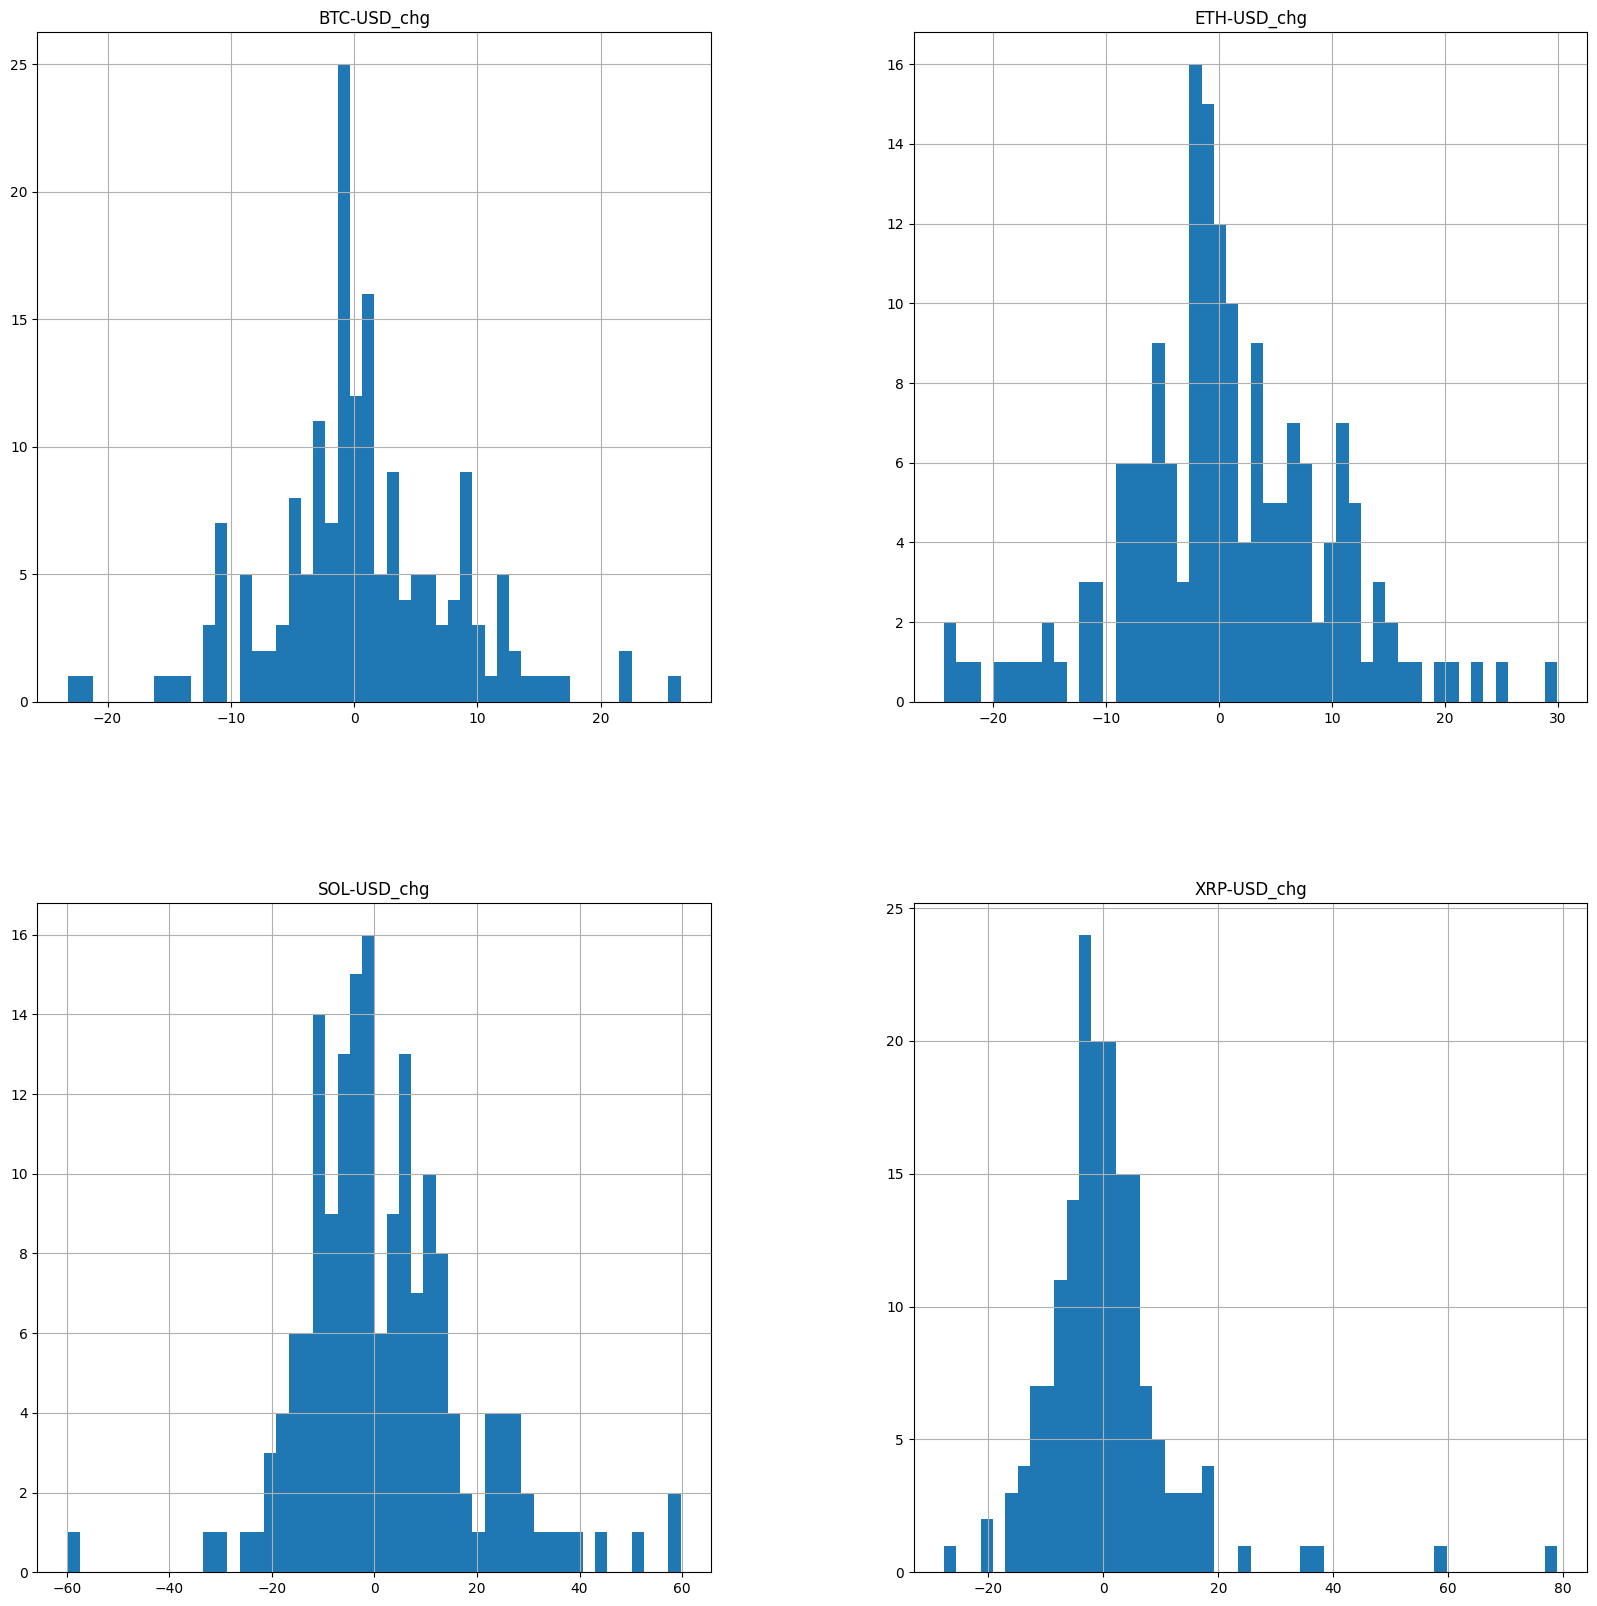

In [10]:
crypto_df[[col  + '_chg' for col in crypto_tickers]].hist(bins = 50, figsize=(20, 20))

# Вывод
Гистограммы ежедневных доходностей центрированы вокруг среднего значения и имеют нормально распределение.


In [11]:
## Test

stat, p = stats.normaltest(crypto_df['ETH-USD_vol_chg'])
print(f'stat={stat}, p={p}')
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=278.0221296939461, p=4.2487542641986594e-61
Probably not Gaussian


In [12]:
stat, p = stats.normaltest(np.log(crypto_df['ETH-USD_vol_chg'] + 80))
print(f'stat={stat}, p={p}')
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=42.35240207604979, p=6.35759328810549e-10
Probably not Gaussian


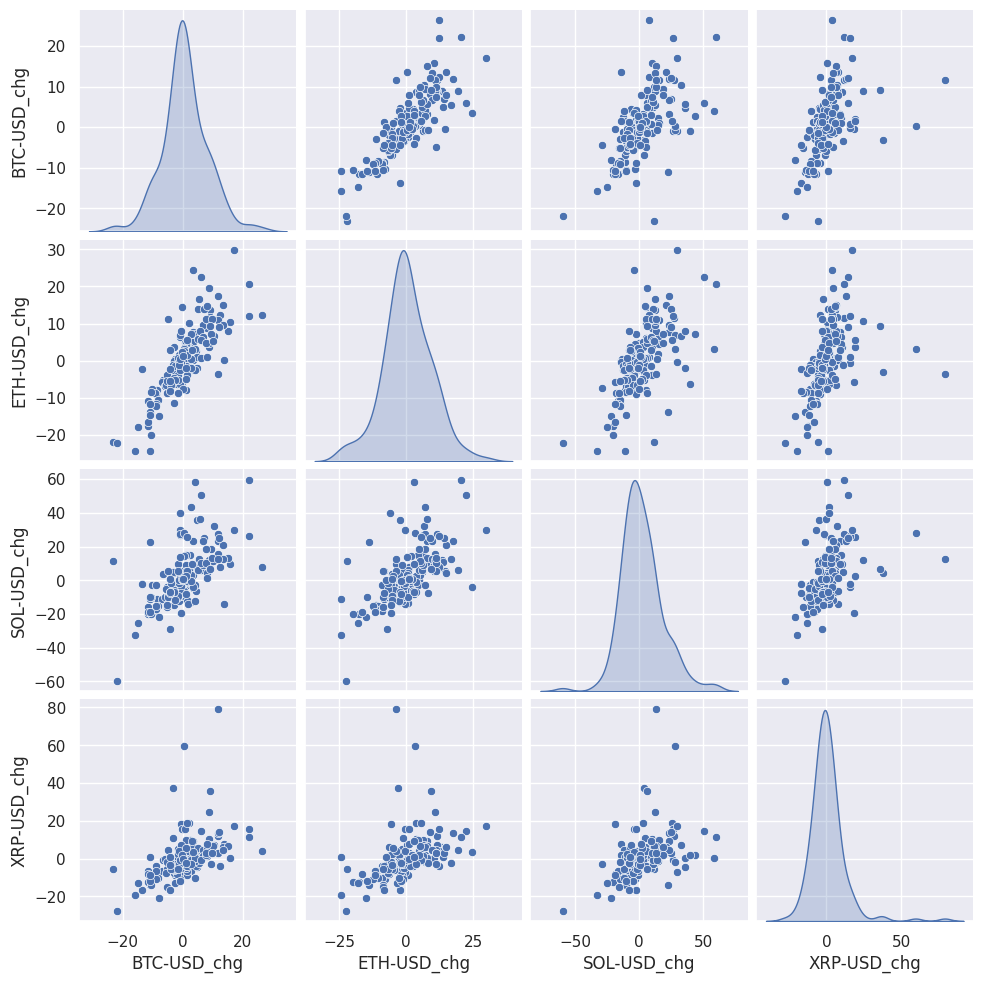

In [13]:
seaborn.set_theme(font_scale=1)
seaborn.pairplot(crypto_df[[col + '_chg' for col in crypto_tickers]], diag_kind="kde")

In [14]:
fig = px.histogram(crypto_df, x='BTC-USD_chg', marginal="violin",)
fig.show()

In [15]:
crypto_df['boxcox_btc_chg'] = stats.boxcox(x=(crypto_df['BTC-USD_chg'] - crypto_df['BTC-USD_chg'].min() + 1))[0]

# plotly
fig = px.histogram(crypto_df, x='boxcox_btc_chg', marginal="violin")
fig.show()

<Axes: >

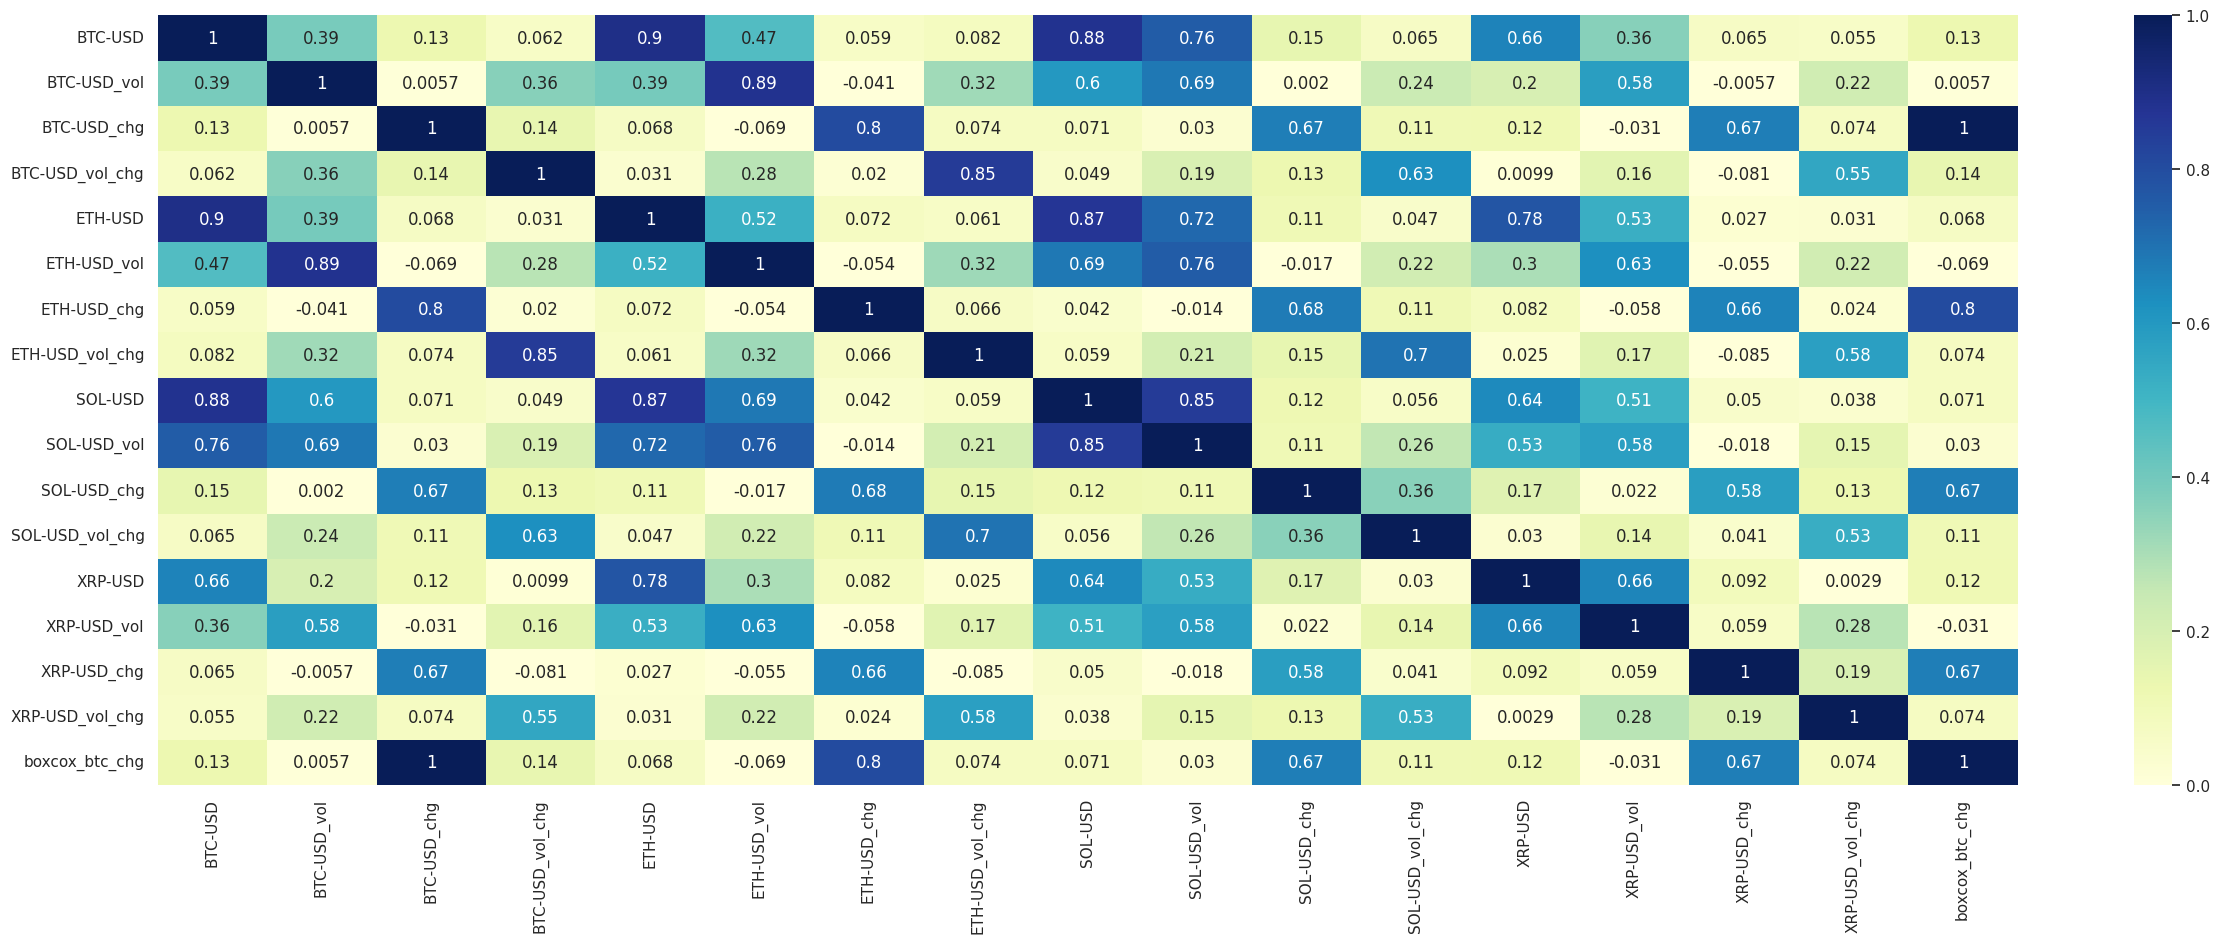

In [16]:
## Корреляция

plt.figure(figsize=(30,10))
seaborn.heatmap(crypto_df.corr(method='spearman', numeric_only=True), vmin=0, vmax=1, cmap='YlGnBu', annot=True)

# Проанализируем тренды

In [17]:
trend_crypto = crypto_df[[col + '_chg' for col in crypto_tickers]]
def trend(x):
    if x > -5 and x <= 5:
        return 'Не менялся'
    elif x > 5 and x <= 15:
        return 'Небольшое увеличение'
    elif x > -15 and x <= -5:
        return 'Небольшой уменьшение'
    elif x > 15 and x <= 25:
        return 'увеличение'
    elif x > -25 and x <= -15:
        return 'уменьшение'
    elif x > 25 and x <= 50:
        return 'Значительное увеличение'
    elif x > -50 and x <= -25:
        return 'Значительное уменьшение'
    elif x > 50:
        return 'Максимальное увеличение'
    elif x <= -50:
        return 'Максимальное уменьшение'

for stock in trend_crypto.columns:
    trend_crypto["Trend_"+ str(stock)] = trend_crypto[stock].apply(lambda x:trend(x))

/tmp/ipykernel_4630/3328104765.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4630/3328104765.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4630/3328104765.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4

In [18]:
trend_columns = [col for col in trend_crypto.columns if 'Trend_' in col]
ind = 0

for i in range(len(crypto_tickers)):
    column = trend_columns[ind]
    data_to_plot = trend_crypto[column].value_counts().round(3)
    fig = px.pie(values=data_to_plot, names=data_to_plot.index)
    fig.update_layout(title=column)
    fig.show()
    ind += 1

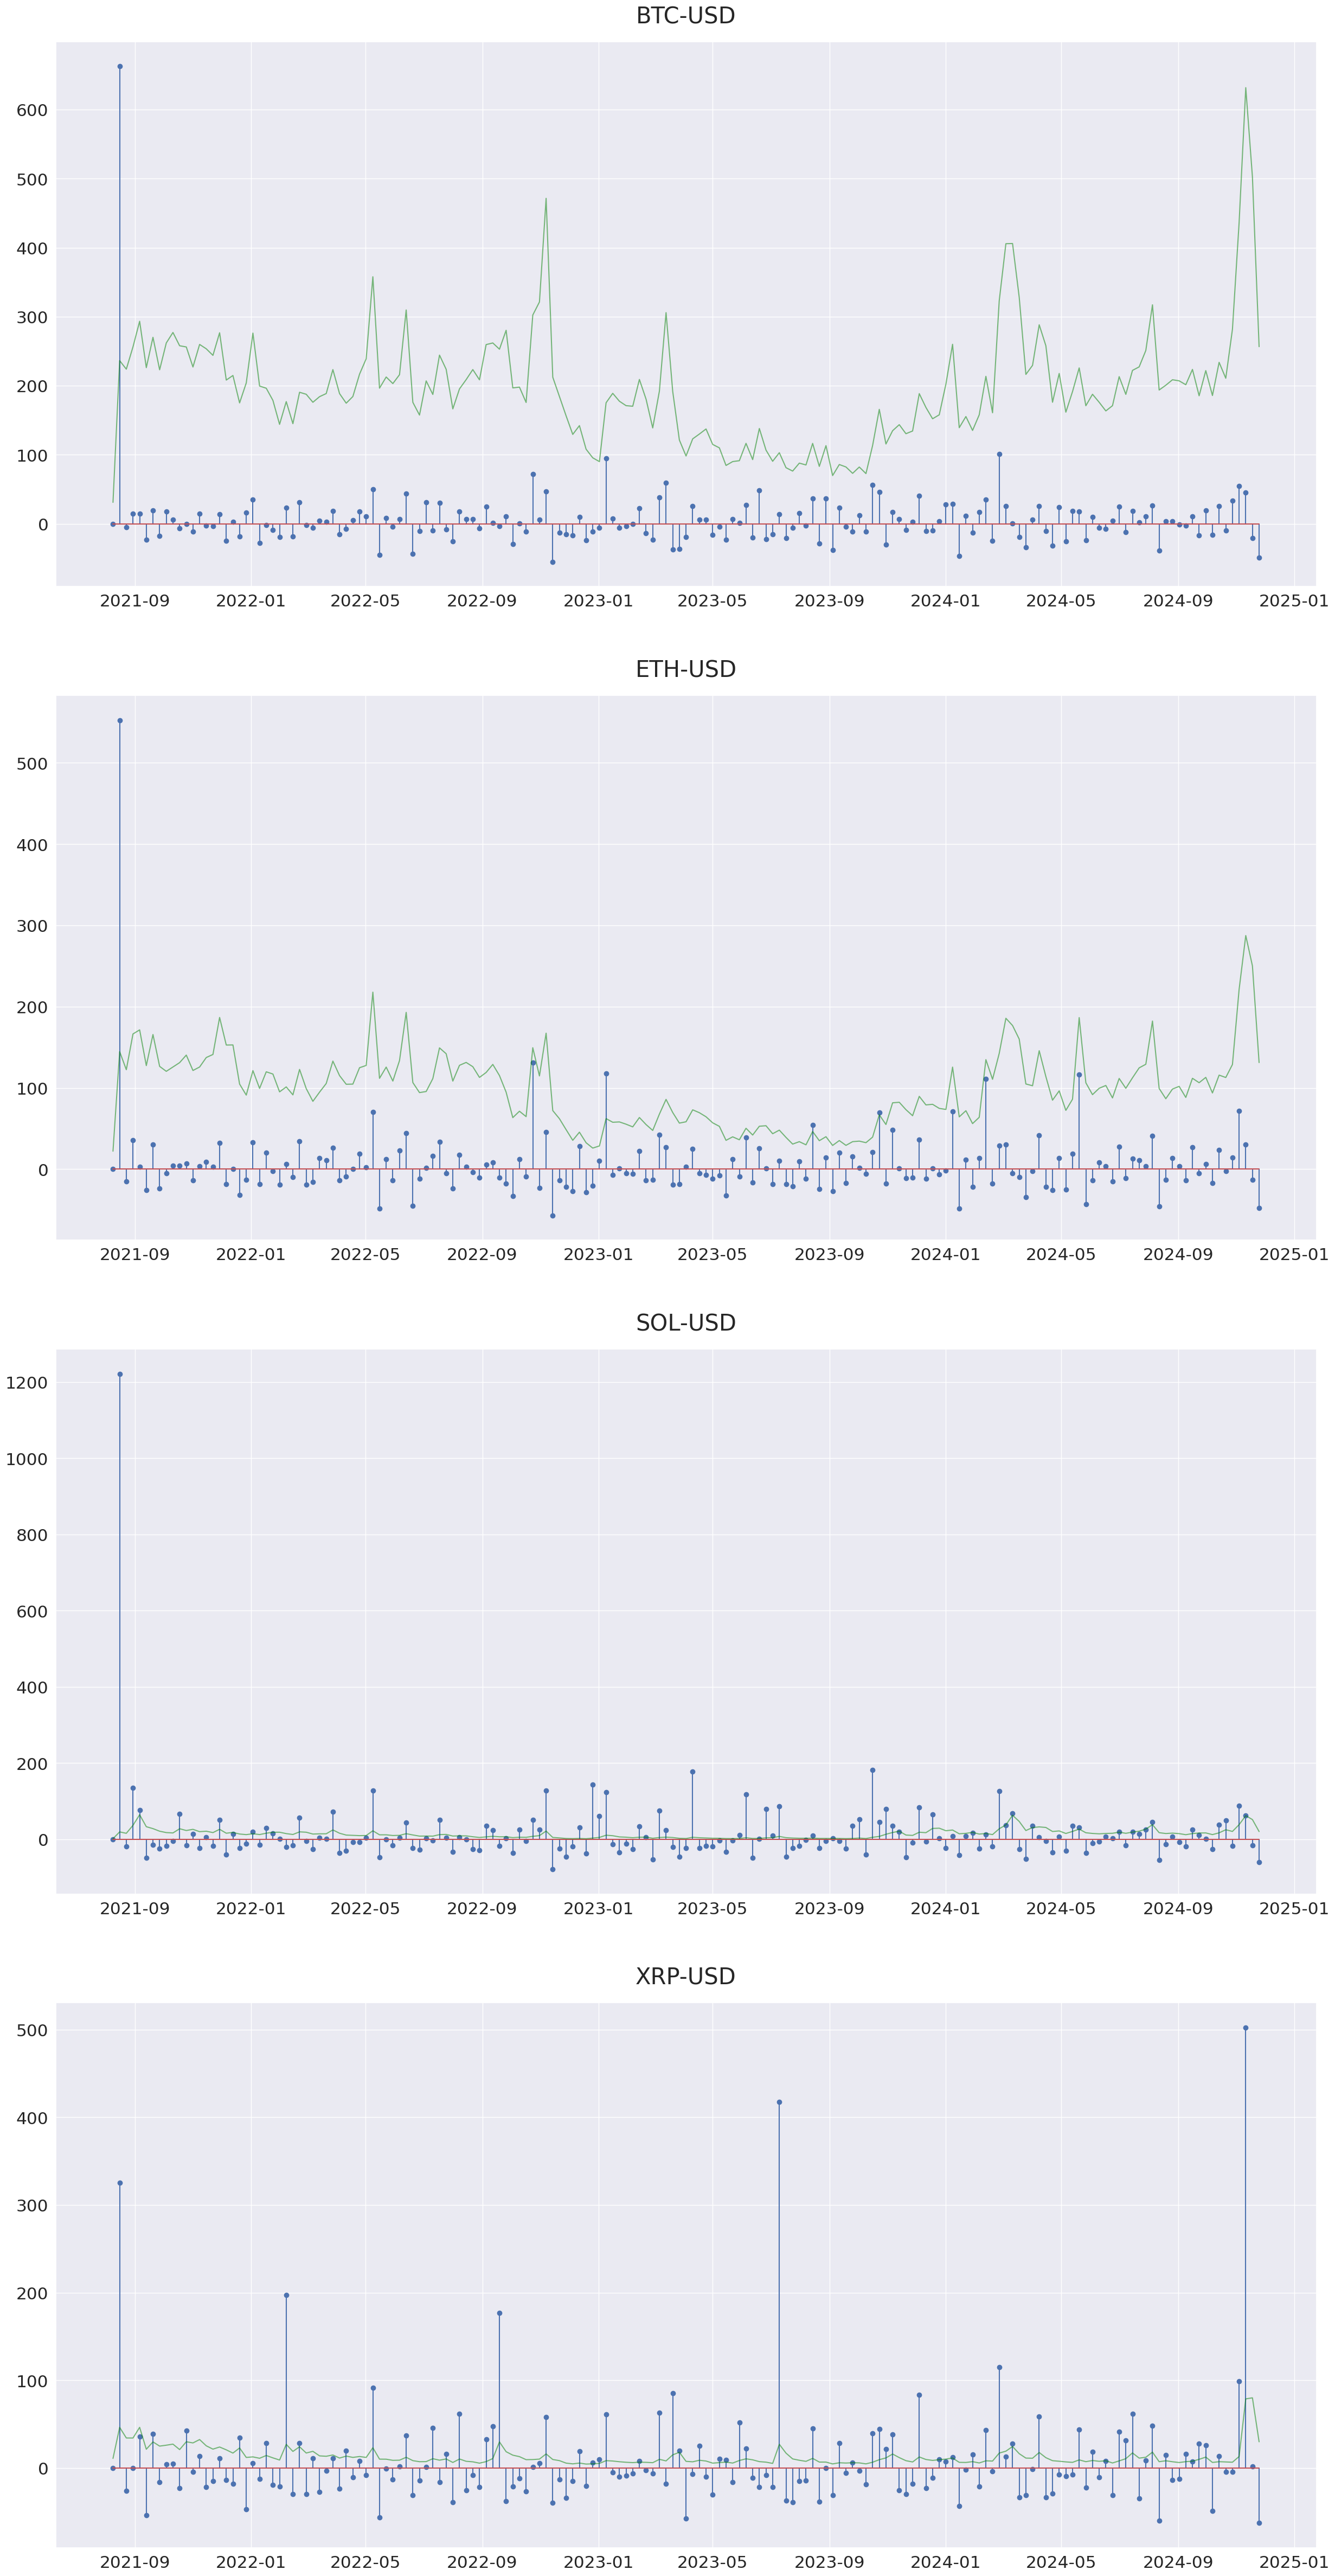

In [19]:
seaborn.set(style="darkgrid")

size=30
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)
fig, axs = plt.subplots(len(crypto_tickers), 1, figsize=(size,size*2))

for i in range(len(crypto_tickers)):
    ticket = crypto_tickers[i]
    ticket_vol_chg = crypto_tickers[i] + '_vol_chg'
    ticket_vol = crypto_tickers[i] + '_vol'
    axs[i].stem(crypto_df.index[-253:], crypto_df[ticket_vol_chg][-253:])
    axs[i].plot((crypto_df[ticket_vol] / 10**9)[-253:], color = 'green', alpha = 0.5)
    axs[i].set_title(ticket)

